<a href="https://colab.research.google.com/github/Kururoll/Proyecto-2/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset 1, Arriendo de Bicicletas
* Objetivo: Predecir el numero de futuros arriendos

Fuente: https://app.dataquest.io/m/213/guided-project%3A-predicting-bike-rentals/1/introduction-to-the-dataset

## Dataset
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In this project, you'll try to predict the total number of bikes people rented in a given hour. You'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, you'll create a few different machine learning models and evaluate their performance.


<font color='red'>El objetivo de este ejercicio, es predecir usando modelos de regresión la cantidad de arriendos por hora segun las caracteristicas del dataset. Este Dataset, cuenta con 14 Caracteristicas (ya que "registered" y "casual" el ejercicio dice que debemos eliminarlas. La posible complicacion que veo es como tratar la columna dteday ya que es un objeto pero con formato fecha, además del entendimiento de los datos en si. Por ultimo, este Dataset cuenta con 17379 filas</font>

In [18]:
#import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn as sns
#import numpy as np
#filename = "/content/hour.csv"
#df = pd.read_csv(filename)
#df.info()

In [19]:
#df.head()

# Dataset 2, Churn Rate
* Objetivo: Predecir si un cliente se cambiara de empresa de telecomunicacioneso no. Este proceso de denomina como "Churng", por lo que hay que predecir el Churng rate

## Librerías

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# DataSet
"state", string. 2-letter code of the US state of customer residence

"account_length", numerical. Number of months the customer has been with the current telco provider

"area_code", string="area_code_AAA" where AAA = 3 digit area code.

"international_plan", (yes/no). The customer has international plan.

"voice_mail_plan", (yes/no). The customer has voice mail plan.

"number_vmail_messages", numerical. Number of voice-mail messages.

"total_day_minutes", numerical. Total minutes of day calls.

"total_day_calls", numerical. Total minutes of day calls.

"total_day_charge", numerical. Total charge of day calls.

"total_eve_minutes", numerical. Total minutes of evening calls.

"total_eve_calls", numerical. Total number of evening calls.

"total_eve_charge", numerical. Total charge of evening calls.

"total_night_minutes", numerical. Total minutes of night calls.

"total_night_calls", numerical. Total number of night calls.

"total_night_charge", numerical. Total charge of night calls.

"total_intl_minutes", numerical. Total minutes of international calls.

"total_intl_calls", numerical. Total number of international calls.

"total_intl_charge", numerical. Total charge of international calls

"number_customer_service_calls", numerical. Number of calls to customer service

"churn", (yes/no). Customer churn - target variable.

<font color='red'>Al igual que en Dataset anterior, la dificultad de este ejercicio la veo en la transformacion y entendimiento de las columnas del dataset. Luego, simplemente habría que probar nuestros modelos de clasificacion (ya que este es un problema de clasificacion) para lograr predecir el Churn Rate. Importante destacar, que nos piden el Churn Rate no el Churn, por lo que al predecir los Churn en el modelo, hay que sacar una tasa de esta columna a travez de la formula Churn yes/ Churn totals</font>

<font color='green'>Importante notar, que este dataset ya viene dividido en "train y test", pero me gustaría juntarlos y crear mi propio split train test para este ejercicio. El Set en total tiene 5000 filas</font>

In [20]:
filename2 = "/content/test.csv"
filename3 = "/content/train.csv"
test = pd.read_csv(filename2)
df = pd.read_csv(filename3)
print(test.shape)
print(df.shape)

df.info()
#test.info()

(750, 20)
(4250, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes        

#DataSet Seleccionado: Churn Rate

##EDA

* Primero, verifico que todas las columnas sean del tipo que corresponde, es decir, columnas numericas deben ser int o float, y categoricas deben ser objet.

Nota: Se trabaja solo la parte de Train dado que este ejercicio de Kaggle esta diseñado para una competencia, es por esto que solo utilizare el dataset de entrenamiento

* Verifico valores Nulos o Duplicados

In [21]:
print(df.isnull().sum())
print(df.duplicated().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64
0


* Procedo a mirar lo que contienen las columnas Objeto

In [30]:
columnas_objeto = df.select_dtypes(include=['object'])
for columna in columnas_objeto:
    print("Columna:", columna)
    print(df[columna].value_counts())
    print("\n")

Columna: state
state
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: count, dtype: int64


Columna: area_code
area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: count, dtype: int64


Columna: international_plan
international_plan
no     3854
yes     396
Name: count, dtype: int64


Columna: voice_mail_plan
voice_mail_plan
no     3138
yes    1112
Name: count, dtype: int64


Columna: churn
churn
no     3652
yes     598
Name: count, dtype: int64




* No se ve nada extraño en las columnas Objeto. Procedo a observar las columnas numericas

In [31]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


* Realizo un boxplot para mirar de mejor manera estos datos

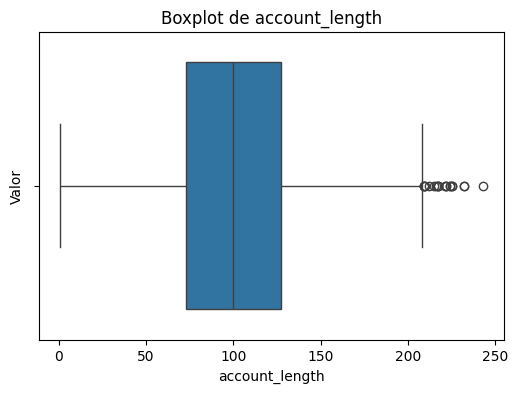

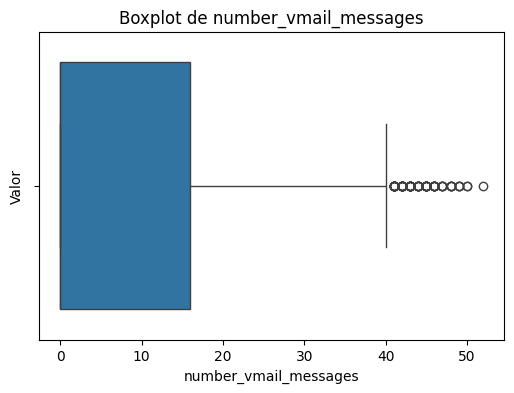

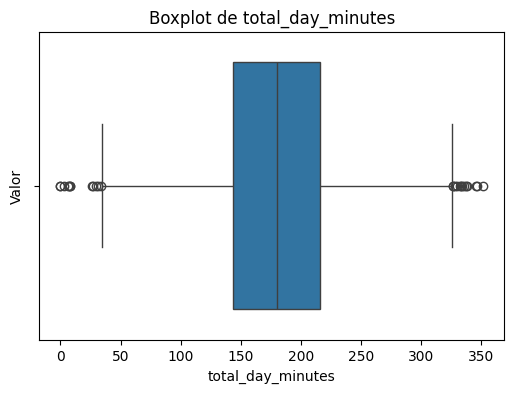

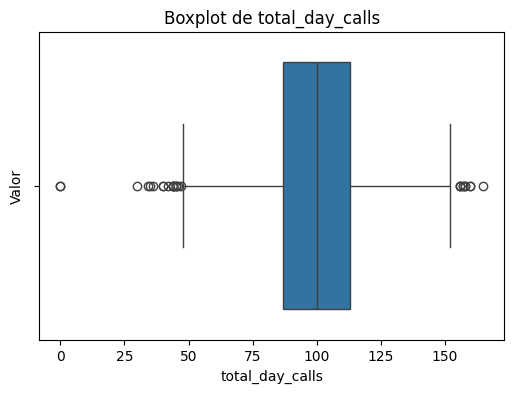

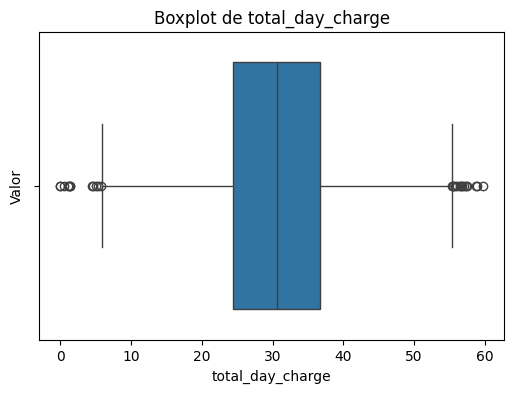

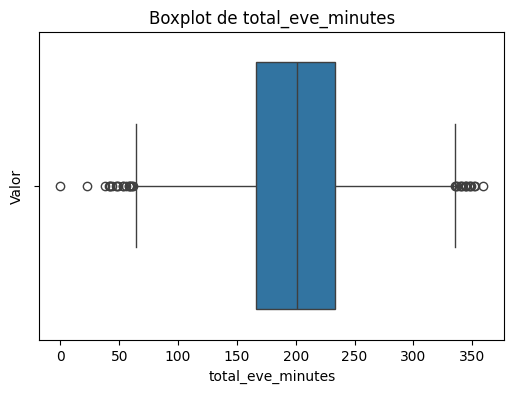

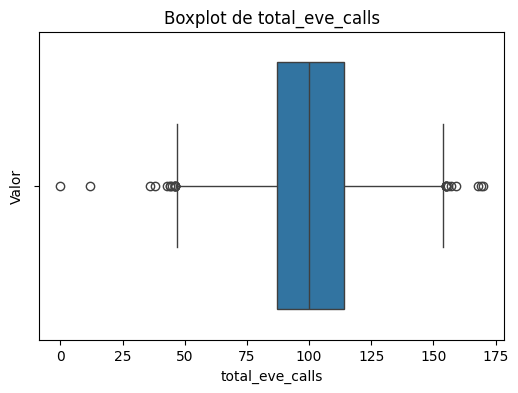

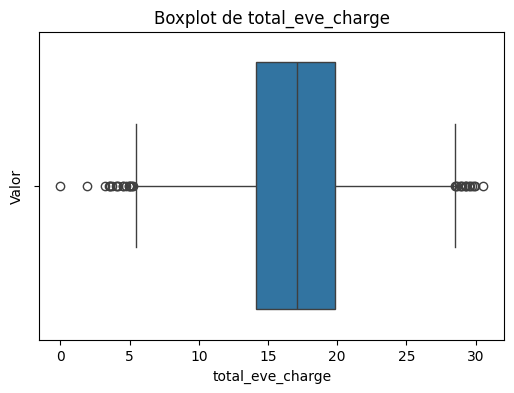

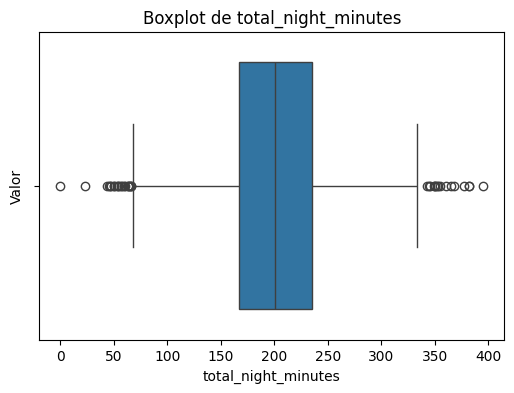

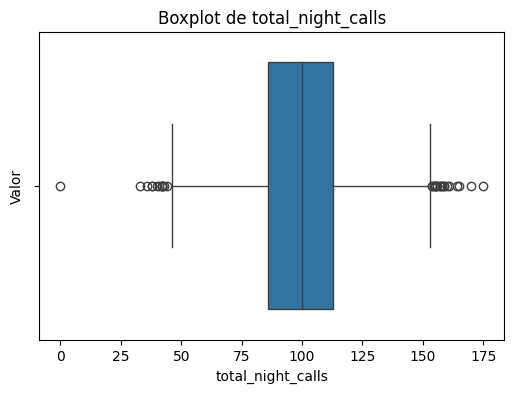

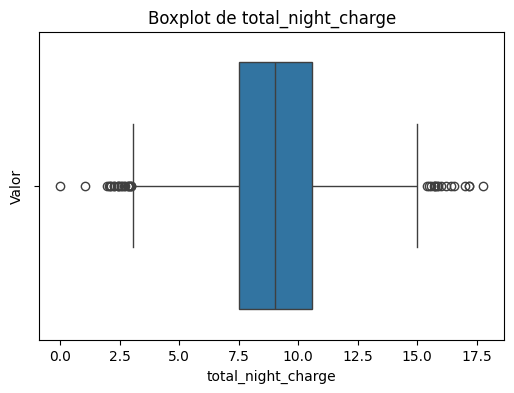

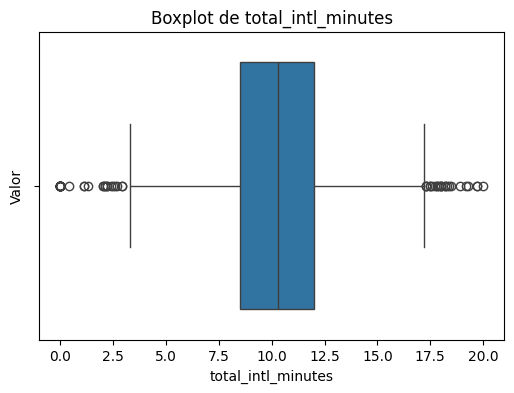

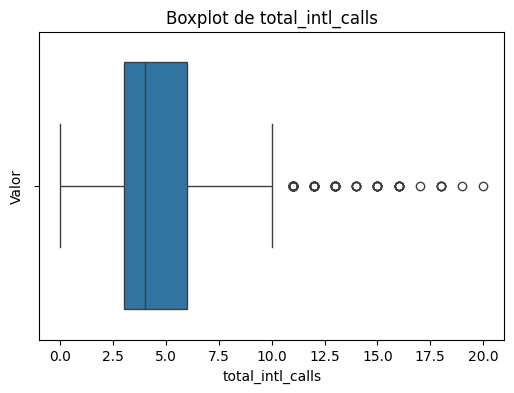

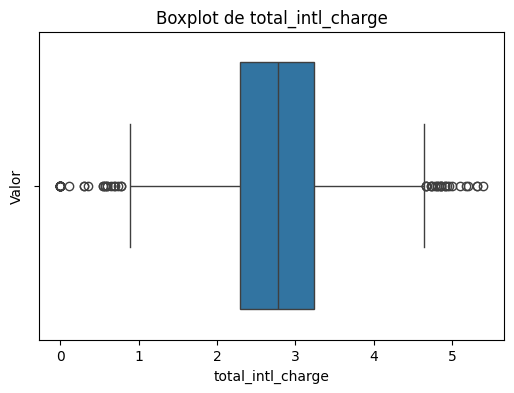

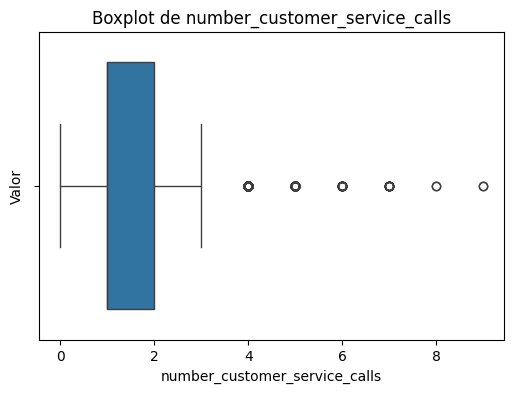

In [34]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int', 'float'])

# Crear boxplot separado para cada columna numérica
for columna in columnas_numericas.columns:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura para cada boxplot
    sns.boxplot(x=df[columna])
    plt.title('Boxplot de {}'.format(columna))
    plt.xlabel('{}'.format(columna))
    plt.ylabel('Valor')
    plt.show()

* Me parece extraño que hayan datos en 0 (exceptuando los datos de llamadas internacionales). Procedo a mirar en mayor detalle estos datos que estan en 0 en cada columna numerica

Para el caso de la columna numer_vmail_message, procedo a ver que los valores sean correctos, es decir, si no tiene plan de voice mail, no debería tener valores en number_vmail_messages

In [41]:
df.groupby('voice_mail_plan')['number_vmail_messages'].value_counts()

voice_mail_plan  number_vmail_messages
no               0                        3138
yes              31                         69
                 28                         58
                 24                         57
                 29                         57
                 33                         55
                 27                         54
                 26                         53
                 32                         47
                 30                         47
                 25                         46
                 23                         40
                 22                         38
                 34                         36
                 21                         35
                 39                         35
                 38                         35
                 35                         34
                 37                         32
                 36                         31
                 20  

* Realizo la misma agrupacion pero con los llamados internacionales y el plan internacional. Procedo a analizar con mayor detalle estas columnas que tienen que ver con datos internacionales.

In [40]:
df.groupby('international_plan')['total_intl_minutes'].value_counts()

international_plan  total_intl_minutes
no                  10.2                  70
                    9.8                   67
                    11.3                  66
                    9.5                   64
                    10.9                  63
                                          ..
yes                 4.9                    1
                    5.3                    1
                    5.9                    1
                    13.1                   1
                    20.0                   1
Name: count, Length: 276, dtype: int64

In [42]:
df.groupby('international_plan')['total_intl_charge'].describe()

,count,mean,std,min,25%,50%,75%,max
international_plan,,,,,,,,
no,3854.0,2.763970,0.747236,0.0,2.3000,2.78,3.2400,5.32
yes,396.0,2.824975,0.723722,0.0,2.3725,2.84,3.2475,5.40


In [45]:
df.groupby(['international_plan', 'total_intl_calls'])['total_intl_charge'].agg(['count', 'mean', 'std', 'min', 'max'])


count      mean       std   min   max
international_plan total_intl_calls                                       
no                 0                    21  0.000000  0.000000  0.00  0.00
                   1                   205  2.819024  0.677369  1.11  4.91
                   2                   592  2.817652  0.708542  0.30  5.32
                   3                   756  2.756032  0.735517  0.65  4.97
                   4                   720  2.809819  0.739154  0.59  5.32
                   5                   547  2.759196  0.686863  0.30  4.86
                   6                   372  2.741075  0.694032  0.70  4.94
                   7                   244  2.792213  0.791394  0.11  4.54
                   8                   142  2.781831  0.693520  1.19  4.37
                   9                   114  2.771491  0.766492  1.03  4.64
                   10                   52  2.689423  0.675796  1.32  4.37
                   11                   33  2.637879  0.741640  0.54  4.08
                   12                   17  2.852353  0.819798  1.70  4.21
                   13                   14  2.662857  0.611234  1.22  3.59
                   14                    5  2.306000  1.112241  1.13  3.67
                   15                    7  2.501429  0.678268  1.22  3.19
                   16                    7  2.930000  0.667308  2.03  4.21
                   17                    1  3.670000       NaN  3.67  3.67
                   18                    4  2.517500  0.714674  1.81  3.51
                   19                    1  2.570000       NaN  2.57  2.57
yes                0                     1  0.000000       NaN  0.00  0.00
                   1                    21  2.623810  0.523187  1.54  3.62
                   2                    52  2.724231  0.565957  1.11  3.75
                   3                    91  2.899011  0.642521  1.57  4.83
                   4                    75  2.720400  0.731658  0.57  5.18
                   5                    51  2.908627  0.748356  1.00  4.73
                   6                    36  2.971389  0.942629  0.35  5.40
                   7                    28  2.855714  0.785378  0.97  3.92
                   8                    11  2.708182  0.552391  1.65  3.38
                   9                    12  2.910000  0.829238  1.43  4.67
                   10                    7  2.611429  0.780970  1.35  3.89
                   11                    5  3.322000  0.530255  2.62  3.89
                   12                    1  3.780000       NaN  3.78  3.78
                   13                    2  2.605000  0.586899  2.19  3.02
                   15                    2  3.240000  0.989949  2.54  3.94
                   20                    1  3.750000       NaN  3.75  3.75

In [47]:
df.groupby('international_plan')['total_intl_charge'].mean()

international_plan
no     2.763970
yes    2.824975
Name: total_intl_charge, dtype: float64

In [49]:
# Calcular el costo promedio por hora de las llamadas internacionales para cada grupo
costo_promedio_por_hora_intl_plan = df[df['international_plan'] == 'yes']['total_intl_charge'] / df[df['international_plan'] == 'yes']['total_intl_minutes']
costo_promedio_por_hora_intl_no_plan = df[df['international_plan'] == 'no']['total_intl_charge'] / df[df['international_plan'] == 'no']['total_intl_minutes']

# Calcular el costo promedio por hora de las llamadas internacionales para cada grupo
print("Costo promedio por hora de llamadas internacionales para la gente con plan internacional:", costo_promedio_por_hora_intl_plan.mean())
print("Costo promedio por hora de llamadas internacionales para la gente sin plan internacional:", costo_promedio_por_hora_intl_no_plan.mean())

Costo promedio por hora de llamadas internacionales para la gente con plan internacional: 0.27005260647709756
Costo promedio por hora de llamadas internacionales para la gente sin plan internacional: 0.27005780290620385


In [50]:
# Calcular el total de llamadas internacionales para personas con plan internacional
total_llamadas_intl_plan = df[df['international_plan'] == 'yes']['total_intl_calls'].sum()

# Calcular el total de llamadas internacionales para personas sin plan internacional
total_llamadas_intl_no_plan = df[df['international_plan'] == 'no']['total_intl_calls'].sum()

# Mostrar el resultado
print("Total de llamadas internacionales para personas con plan internacional:", total_llamadas_intl_plan)
print("Total de llamadas internacionales para personas sin plan internacional:", total_llamadas_intl_no_plan)

# Comparar los totales
if total_llamadas_intl_plan > total_llamadas_intl_no_plan:
    print("Las personas con plan internacional realizan más llamadas internacionales.")
elif total_llamadas_intl_plan < total_llamadas_intl_no_plan:
    print("Las personas sin plan internacional realizan más llamadas internacionales.")
else:
    print("El número de llamadas internacionales es igual para ambos grupos.")

Total de llamadas internacionales para personas con plan internacional: 1774
Total de llamadas internacionales para personas sin plan internacional: 17038
Las personas sin plan internacional realizan más llamadas internacionales.


* Las llamadas sin plan internacional son ligeramente más caras que las llamadas internacionales con plan, por lo que para un cliente, no conviene contratar el plan por la leve diferencia que existe. La empresa tiene una oportunidad de mejora en mejorar su plan internacional para que más gente lo tome.

* Después de mirar los datos, puede que existan valores en 0, ya que corresponden a llamadas categorizadas en "durante el día, durante la tarde o durante la noche", por lo que pueden tener registros en 0 sin problemas.

* Ahora, procedo a mirar la consistencia de la data, es decir, si el cliente no tuvo llamados durante el dia, todas las columnas asociadas al dia, deberían estar en 0, lo mismo para los llamados de la tarde y los nocturnos

In [52]:
# Filtrar las filas donde total_day_minutes es igual a 0
df_filtrado = df[df['total_day_minutes'] == 0]

# Verificar si todas las columnas relacionadas con el día están en 0 para estas filas filtradas
columnas_day = ['total_day_calls', 'total_day_charge']
relacion_correcta = (df_filtrado[columnas_day].eq(0)).all().all()

# Mostrar el resultado
if relacion_correcta:
    print("Para las filas donde total_day_minutes es 0, todas las otras columnas 'day' también están en 0.")
else:
    print("No todas las otras columnas 'day' están en 0 para las filas donde total_day_minutes es 0.")
df_filtrado.head()

Para las filas donde total_day_minutes es 0, todas las otras columnas 'day' también están en 0.


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,costo_por_hora_nacional,costo_por_hora_internacional
1138,SD,98,area_code_415,no,no,0,0.0,0,0.0,159.6,...,167.1,88,7.52,6.8,1,1.84,4,yes,NaN,0.270588
1183,VT,101,area_code_510,no,no,0,0.0,0,0.0,192.1,...,168.8,95,7.60,7.2,4,1.94,1,no,NaN,0.269444


In [54]:
# Filtrar las filas donde total_eve_minutes es igual a 0
df_filtrado_eve = df[df['total_eve_minutes'] == 0]

# Verificar si todas las columnas relacionadas con la tarde están en 0 para estas filas filtradas
columnas_eve = ['total_eve_calls', 'total_eve_charge']
relacion_correcta_eve = (df_filtrado_eve[columnas_eve].eq(0)).all().all()

# Filtrar las filas donde total_night_minutes es igual a 0
df_filtrado_night = df[df['total_night_minutes'] == 0]

# Verificar si todas las columnas relacionadas con la noche están en 0 para estas filas filtradas
columnas_night = ['total_night_calls', 'total_night_charge']
relacion_correcta_night = (df_filtrado_night[columnas_night].eq(0)).all().all()

# Mostrar el resultado para la tarde
if relacion_correcta_eve:
    print("Para las filas donde total_eve_minutes es 0, todas las otras columnas 'eve' también están en 0.")
else:
    print("No todas las otras columnas 'eve' están en 0 para las filas donde total_eve_minutes es 0.")

# Mostrar el resultado para la noche
if relacion_correcta_night:
    print("Para las filas donde total_night_minutes es 0, todas las otras columnas 'night' también están en 0.")
else:
    print("No todas las otras columnas 'night' están en 0 para las filas donde total_night_minutes es 0.")

Para las filas donde total_eve_minutes es 0, todas las otras columnas 'eve' también están en 0.
Para las filas donde total_night_minutes es 0, todas las otras columnas 'night' también están en 0.


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,costo_por_hora_nacional,costo_por_hora_internacional
2482,UT,97,area_code_415,no,no,0,209.2,134,35.56,0.0,...,175.4,94,7.89,11.8,6,3.19,1,no,0.169981,0.270339


* Al parecer, las columnas tienen sentido. Procedo a ver la correlación entre mis columnas numéricas vs la columna objetivo que sería "Churn", para esto, primero debo convertir a numérica la columna objetivo.

In [55]:
# Crear un diccionario de mapeo para convertir 'no' a 0 y 'yes' a 1
mapeo_churn = {'no': 0, 'yes': 1}

# Aplicar el mapeo a la columna 'churn'
df['churn'] = df['churn'].map(mapeo_churn)

df["churn"].value_counts()

churn
0    3652
1     598
Name: count, dtype: int64

In [60]:
# Suponiendo que tu DataFrame se llama df y las columnas que deseas eliminar son 'columna1' y 'columna2'
columnas_a_eliminar = ['costo_por_hora_nacional', 'costo_por_hora_internacional']

# Eliminar las columnas del DataFrame
df = df.drop(columnas_a_eliminar, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

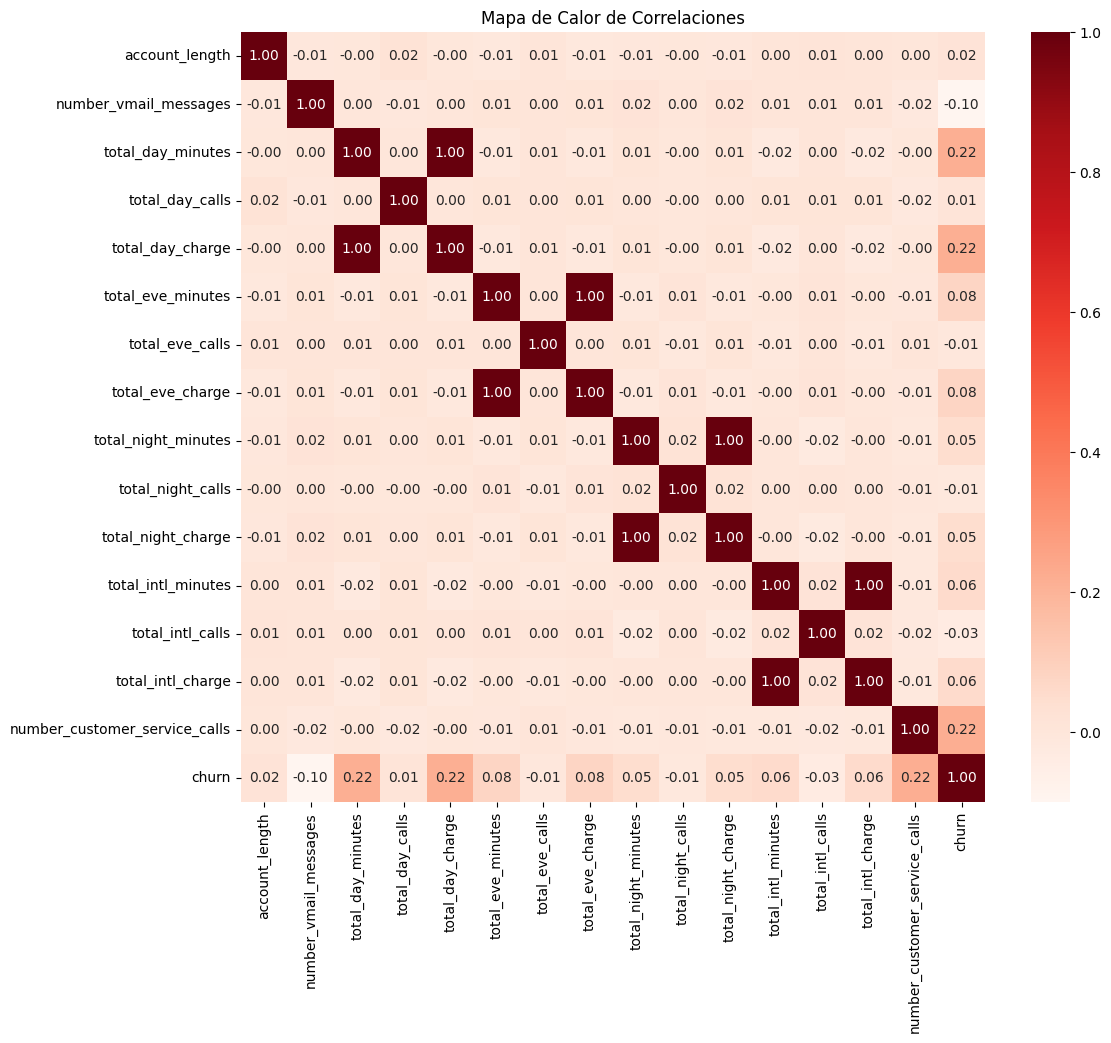

In [61]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlaciones = df_numeric.corr()

# Crear un mapa de calor de correlaciones con tonos de rojo
plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura
sns.heatmap(correlaciones, annot=True, cmap='Reds', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()